# Artificial Neural Network (ANN) - Fashion MNIST dataset


## Import Packages

In [1]:
#pip install tensorflow==2.0.0-rc1
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [115]:
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [116]:
print(tf.version.VERSION)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is available


In [117]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<ipython-input-117-4d1ca8c59940>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1400x1100 with 0 Axes>

In [118]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [119]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [120]:
train_images.shape

(60000, 28, 28)

In [121]:
len(train_labels)

60000

In [122]:
labels, counts = np.unique(train_labels, return_counts=True)

print(np.asarray((labels, counts)).T)

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [123]:
test_images.shape

(10000, 28, 28)

In [124]:
len(test_images)

10000

## Preprocess the data




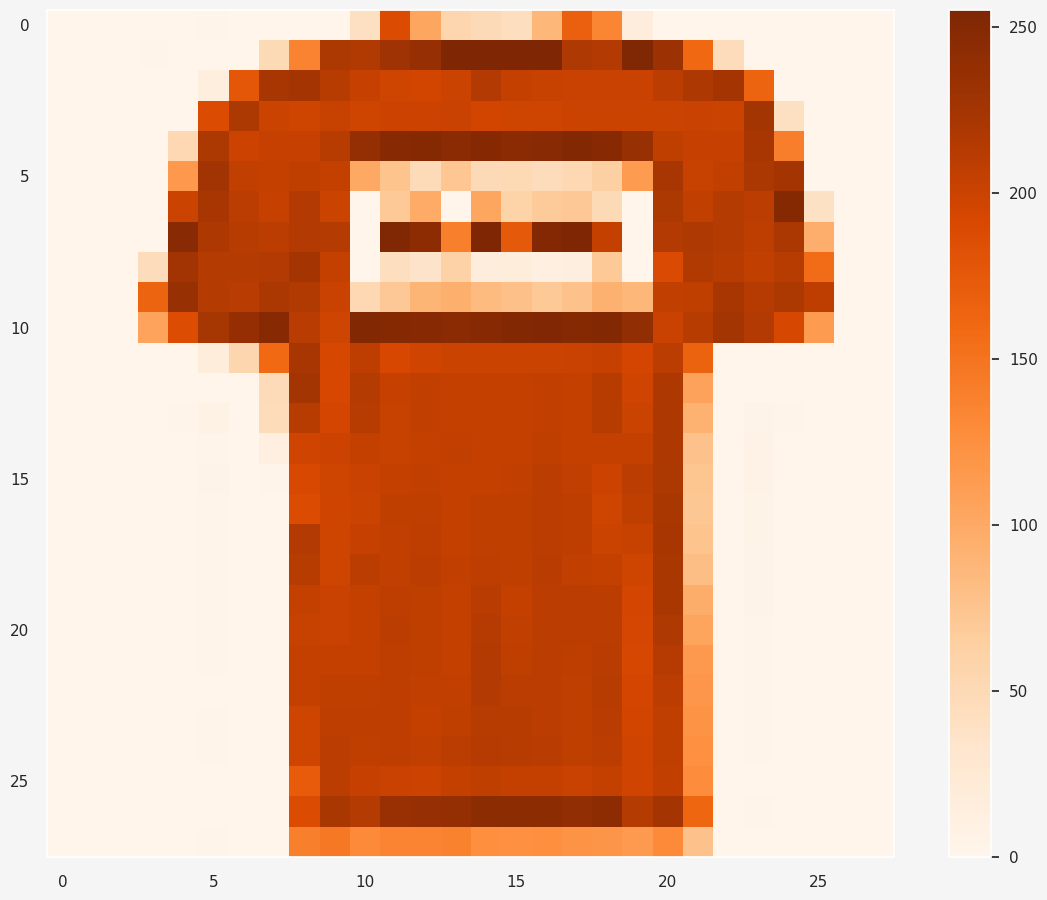

In [126]:
plt.figure()
plt.imshow(train_images[1], cmap="Oranges", interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [127]:
train_images = train_images / 255.0

test_images = test_images / 255.0

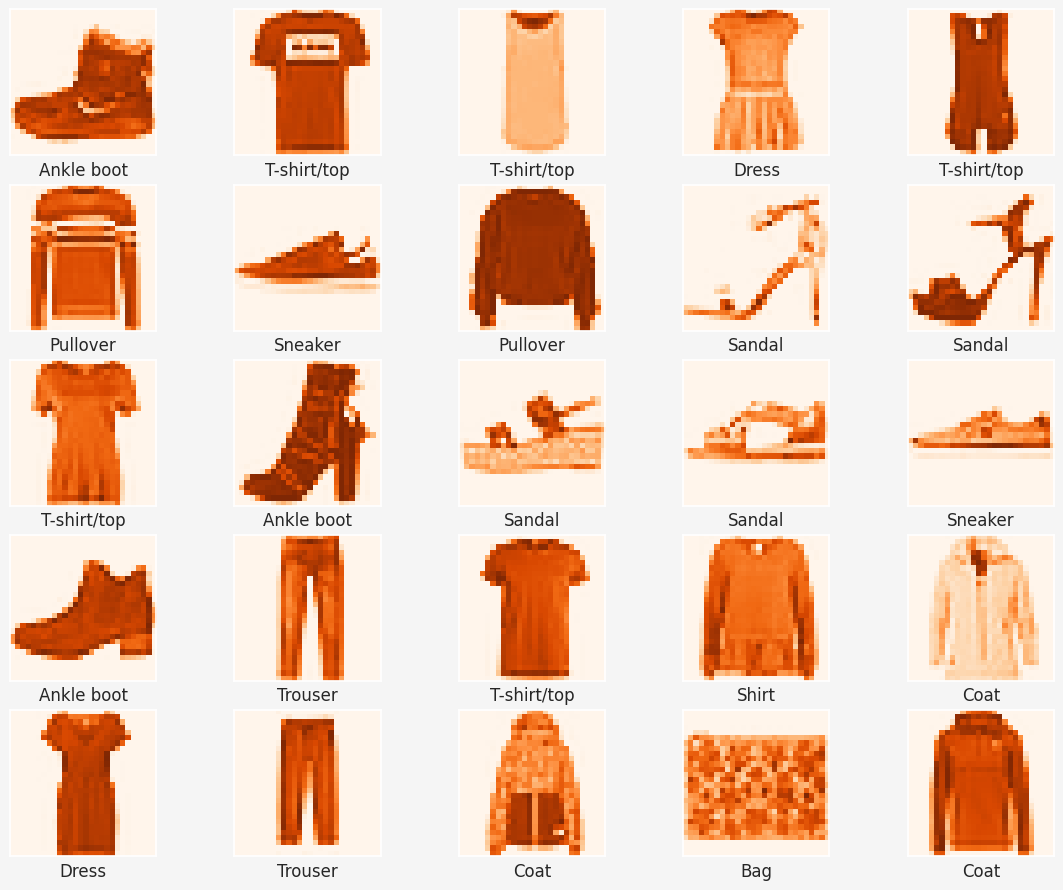

In [129]:
for i in range(25) :
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='Oranges', interpolation='nearest')
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)

plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [130]:
input_size = 784
output_size = 10
hidden_layer_size = 256

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(output_size, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
history = model.fit(train_images, train_labels, epochs=20, verbose=2)

Epoch 1/20
1875/1875 - 5s - loss: 0.4681 - sparse_categorical_accuracy: 0.8314 - 5s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 4s - loss: 0.3580 - sparse_categorical_accuracy: 0.8683 - 4s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 4s - loss: 0.3249 - sparse_categorical_accuracy: 0.8790 - 4s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 5s - loss: 0.3004 - sparse_categorical_accuracy: 0.8871 - 5s/epoch - 2ms/step
Epoch 5/20
1875/1875 - 4s - loss: 0.2813 - sparse_categorical_accuracy: 0.8946 - 4s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 4s - loss: 0.2651 - sparse_categorical_accuracy: 0.8997 - 4s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 5s - loss: 0.2534 - sparse_categorical_accuracy: 0.9042 - 5s/epoch - 2ms/step
Epoch 8/20
1875/1875 - 4s - loss: 0.2422 - sparse_categorical_accuracy: 0.9079 - 4s/epoch - 2ms/step
Epoch 9/20
1875/1875 - 4s - loss: 0.2339 - sparse_categorical_accuracy: 0.9104 - 4s/epoch - 2ms/step
Epoch 10/20
1875/1875 - 5s - loss: 0.2234 - sparse_categorical_accuracy: 0.9150 - 5s/epoch 

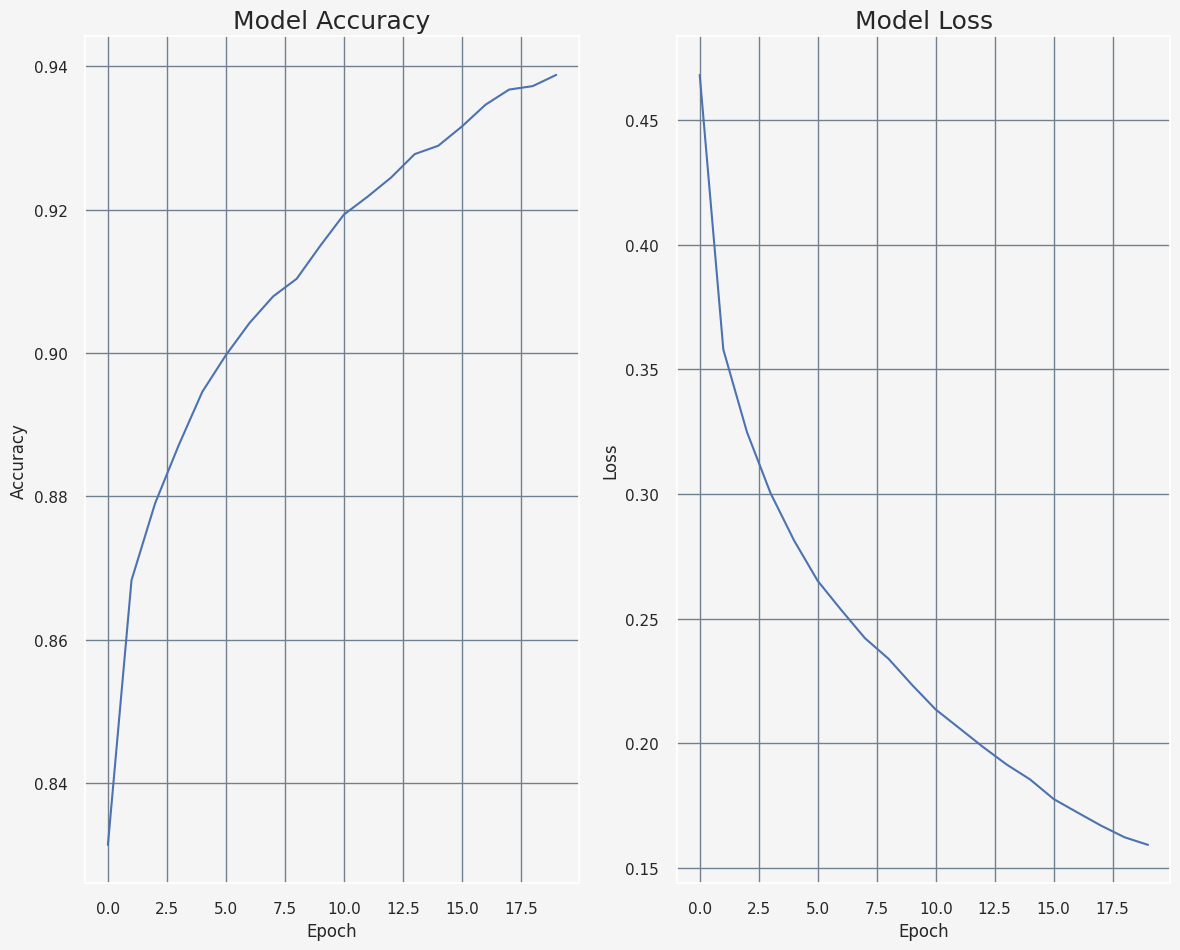

In [132]:
plt.subplot(1,2,1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [133]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4344 - sparse_categorical_accuracy: 0.8867 - 635ms/epoch - 2ms/step

Test accuracy: 0.8866999745368958


In [134]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [135]:
predictions[0]

array([2.9264785e-11, 4.3202625e-08, 2.3993802e-11, 1.0203174e-07,
       1.9492485e-09, 1.3527540e-06, 7.5043083e-10, 1.1059815e-04,
       2.4956554e-11, 9.9988794e-01], dtype=float32)

In [136]:
np.argmax(predictions[0])

9

In [137]:
test_labels[0]

9

In [138]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#345678")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

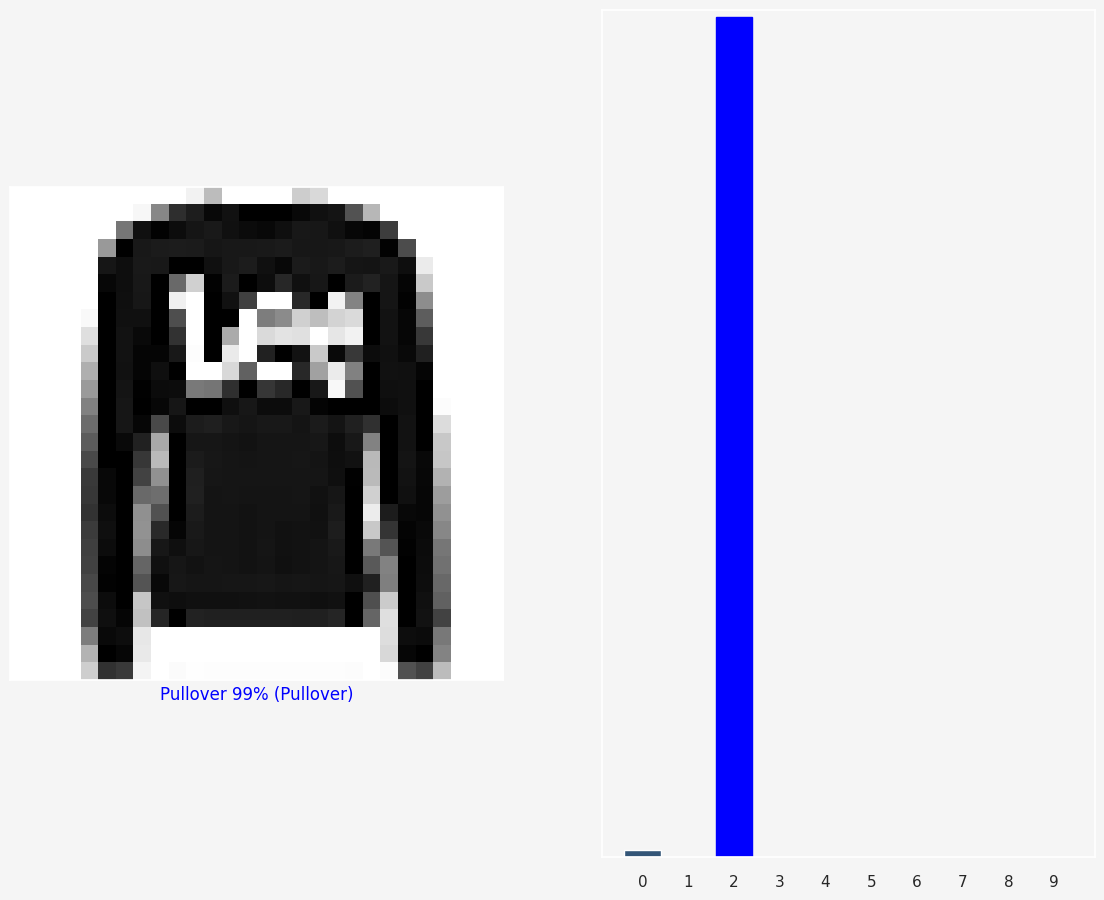

In [139]:
i = 1
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

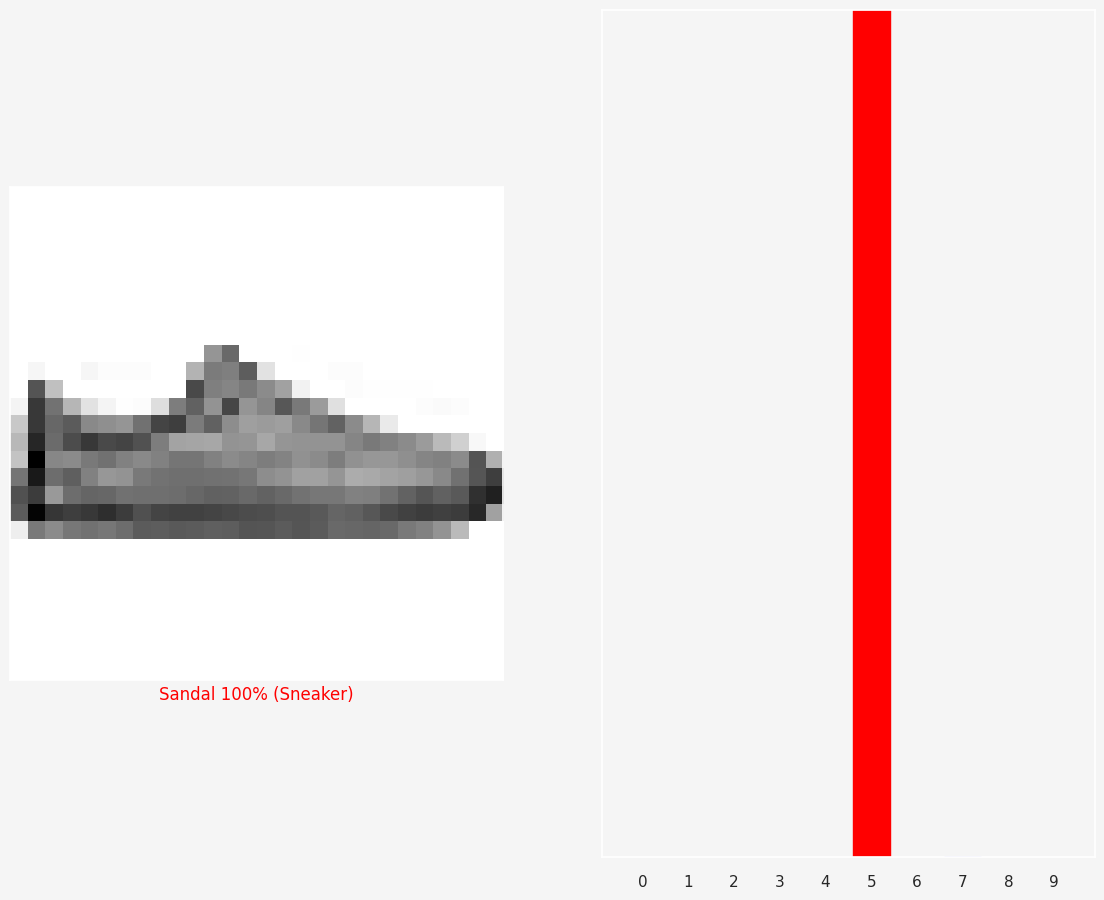

In [140]:
i = 12
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

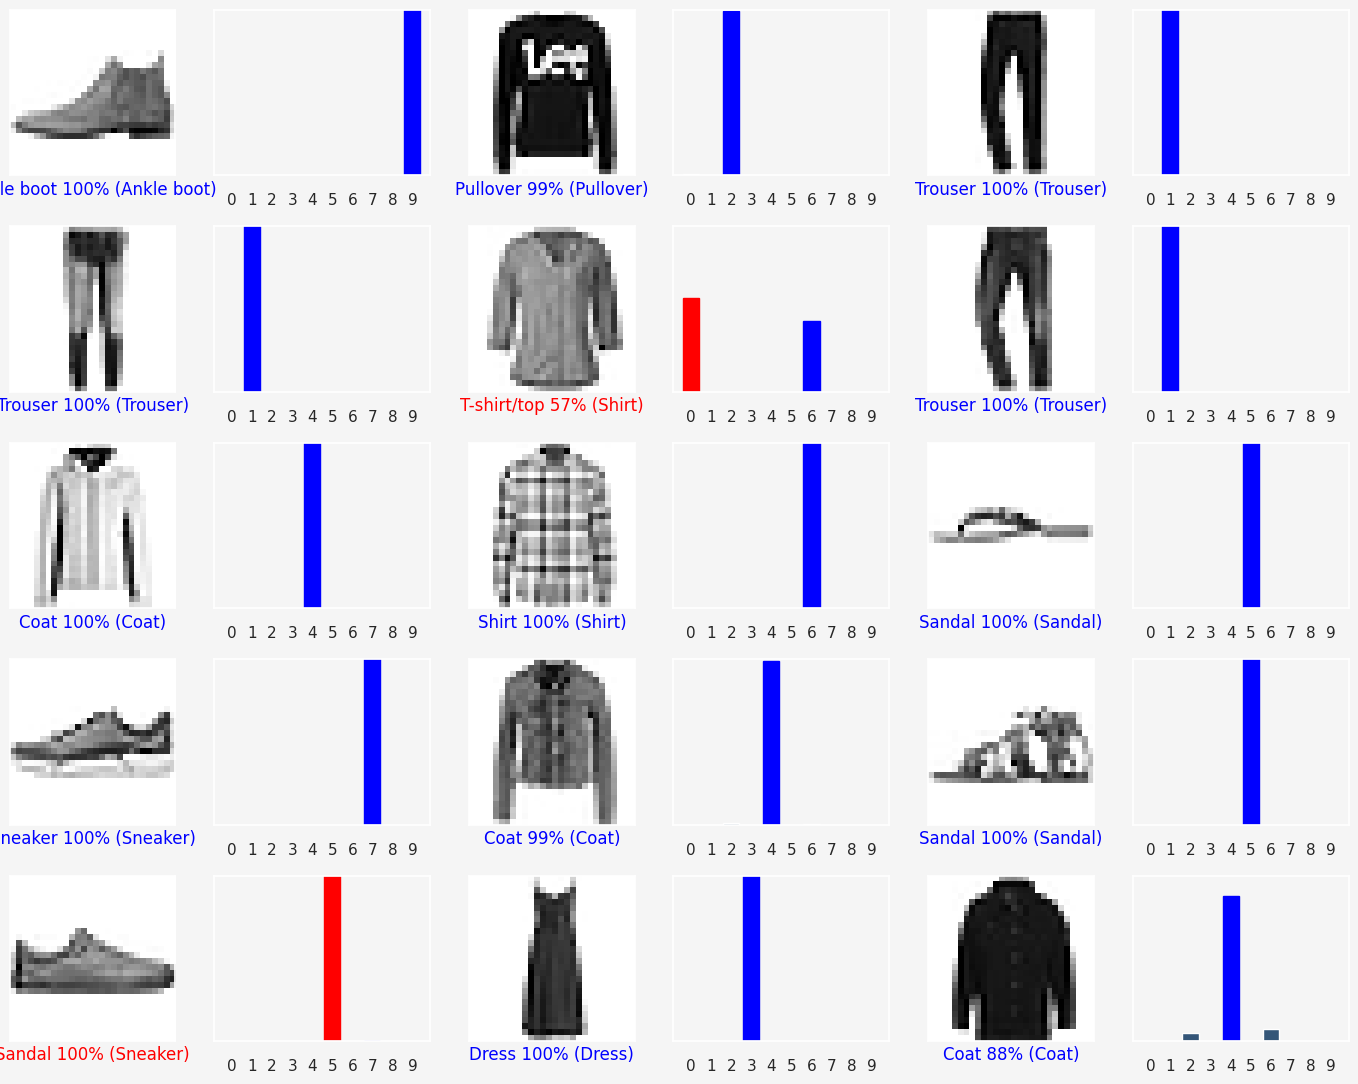

In [141]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Saving the model

### Saving the architecture (topology) of the network

In [142]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### Saving network weights

In [143]:
model.save_weights("fashion_model.h5")